<a href="https://colab.research.google.com/github/Alzategelizabeth/Cartografia-/blob/main/Taller%207/MetodosBasadosEnDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 2.2 MB/s 


##**INVENTARIO**

In [6]:
#Libreria
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(821560,)

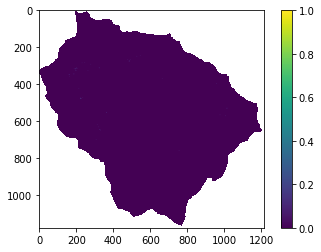

In [7]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/InventarioMenM.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario>1,np.nan,inventario)#np.where--cambia los valores menores a 0
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)] # para eliminar  del vector los datos No data y dejar solo los que tienen datos en la cuenca
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [8]:
np.unique(inventario)#para conocer los numeros almacenados en el raster

array([ 0.,  1., nan])

##**Método Bivariado (*Frequency Ratio Model*)**






**PENDIENTE**

In [9]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica

(821560,)

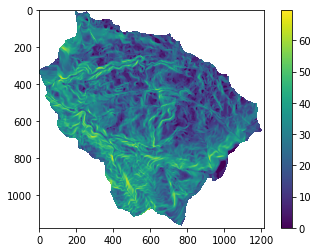

In [10]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente2.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape

In [11]:
print(type(pendiente_vector_MenM))
print(pendiente_vector_MenM)

<class 'numpy.ndarray'>
[35.67238998 35.07823181 32.97435379 ... 14.41195297 12.1252861
 16.4717617 ]


In [12]:
pendiente_serie=pd.Series(pendiente_vector_MenM)
ap=bp=cp=dp=ep=fp=0
for row in pendiente_serie:
        if (0 <= row) & (row < 10):
          ap+=1
        elif (10 <= row) & (row < 19):
          bp+=1
        elif (19 <= row) & (row < 26):
          cp+=1
        elif (26 <= row) & (row < 33):
          dp+=1
        elif (33 <= row) & (row < 47):
          ep+=1
        if (row>=47):
          fp+=1

totalp=ap+bp+cp+dp+ep
print("total:", totalp,ap,bp,cp,dp,ep,fp)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=dp1=ep1=fp1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 10):
          ap1+=1
        elif (10 <= row) & (row < 19):
          bp1+=1
        elif (19 <= row) & (row < 26):
          cp1+=1
        elif (26 <= row) & (row < 33):
          dp1+=1
        elif (33 <= row) & (row < 47):
          ep1+=1
        if (row>=47):
          fp1+=1

total1p=ap1+bp1+cp1+dp1+ep1+fp1
print("total1:", total1p,ap1,bp1,cp1,dp1,ep1,fp1)

total: 782357 66343 164951 167687 172151 211225 39203
total1: 52 1 5 3 7 29 7


In [13]:
w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)
w_d=(dp1/total1p)/(dp/totalp)
w_e=(ep1/total1p)/(ep/totalp)
w_f=(fp1/total1p)/(fp/totalp)
print(w_a,w_b,w_c,w_d,w_e, w_f)
#se cambio total1 por total1p y total pot totalp, verificar si es correcto#

0.22678092523818527 0.45605443201547496 0.26916803788743776 0.6117727370827847 2.0656384460609813 2.686459925555148


[0.22678093 0.26916804 0.45605443 0.61177274 2.06563845 2.68645993
        nan]


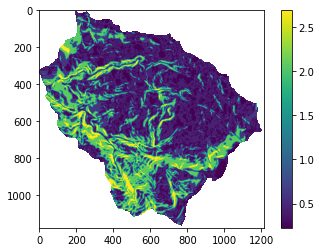

In [14]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),w_a,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=10, pendiente_re<19 )),w_b,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=19, pendiente_re<26 )),w_c,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=26, pendiente_re<33 )),w_d,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=33, pendiente_re<47 )),w_e,pendiente_re);
pendiente_re=np.where ( pendiente_re>=47,w_f,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();

**ASPECTO**

(821560,)

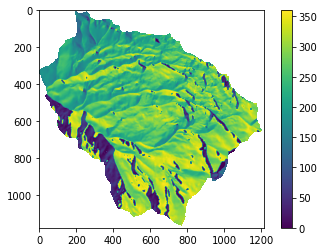

In [15]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-2,np.nan,aspecto)
aspecto=np.where(aspecto<0,0,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

In [19]:
aspecto_serie=pd.Series(aspecto_vector_MenM)
aa=ba=ca=da=ea=0
for row in aspecto_serie:
        if (0 <= row) & (row < 157):
          aa+=1
        elif (157 <= row) & (row < 203):
          ba+=1
        elif (203 <= row) & (row < 248):
          ca+=1
        elif (248 <= row) & (row < 293):
          da+=1
        if (row>=293):
          ea+=1

totala=aa+ba+ca+da+ea
print("total:", totala,aa,ba,ca,da,ea)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=da1=ea1=0
for row in aspectoconMenM:
        if (0 < row) & (row < 157):
          aa1+=1
        elif (157 <= row) & (row < 203):
          ba1+=1
        elif (203 <= row) & (row < 248):
          ca1+=1
        elif (248 >= row) & (row < 293):
          da1+=1
        if (row>=293):
          ea1+=1

total1a=aa1+ba1+ca1+da1+ea1
print("total1:", total1a,aa1,ba1,ca1,da1,ea1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)
w_d=(da1/total1a)/(da/totala)
w_e=(ea1/total1a)/(ea/totala)
print("w:", w_a,w_b,w_c,w_d,w_e)



total: 821560 119749 77831 153414 209682 260884
total1: 821552 5 26 12 821508 1
w: 4.175440870768209e-05 0.00033406037670527625 7.822048086880554e-05 3.917913791224534 3.833158559617471e-06


[3.83315856e-06 4.17544087e-05 7.82204809e-05 3.34060377e-04
 3.91791379e+00            nan]


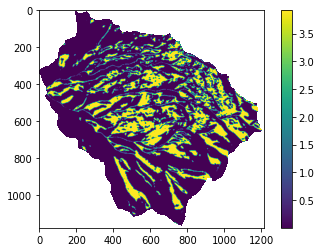

In [20]:
aspecto_re=np.where ( (np.logical_and (aspecto>=0, aspecto<157 )),w_a,aspecto );
aspecto_re=np.where ( (np.logical_and (aspecto_re>=157, aspecto_re<203 )),w_b,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=203, aspecto_re<248 )),w_c,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=248, aspecto_re<293 )),w_d,aspecto_re);
aspecto_re=np.where ( aspecto_re>=293,w_e,aspecto_re);
print(np.unique(aspecto_re));
plt.imshow(aspecto_re);
plt.colorbar();

**CURVATURA**

(821560,)

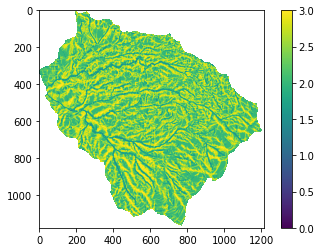

In [21]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/curvaturasumppointoraster.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura>3,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
np.unique(curvatura)
curvatura_vector_MenM.shape

In [22]:
curvatura_serie=pd.Series(curvatura_vector_MenM)
ap=bp=cp=0
for row in pendiente_serie:
        if (0 <= row) & (row < 1):
          ap+=1
        elif (1 <= row) & (row < 2):
          bp+=1
        if (row>=2):
          cp+=1

totalp=ap+bp+cp
print("total:", totalp,ap,bp,cp)

curvaturaconMenM=curvatura_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=0
for row in curvaturaconMenM:
        if (0 < row) & (row < 1):
          ap1+=1
        elif (1 <= row) & (row < 2):
          bp1+=1
        if (row>=2):
          cp1+=1

total1p=ap1+bp1+cp1
print("total1:", total1p,ap1,bp1,cp1)

total: 821560 6958 2631 811971
total1: 52 0 5 47


In [27]:
w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)
print('w:',w_a,w_b,w_c)

w: 0.0 30.02514399321697 0.9145201566975251


[0.         0.91452016        nan]


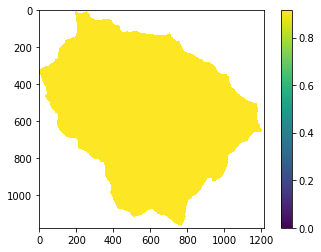

In [25]:
curvatura_re=np.where ( (np.logical_and (curvatura>=0, curvatura<1 )),w_a,curvatura );
curvatura_re=np.where ( (np.logical_and (curvatura_re>=1, curvatura_re<2 )),w_b,curvatura_re);
curvatura_re=np.where ( curvatura_re>=2,w_c,curvatura_re);
print(np.unique(curvatura_re));
plt.imshow(curvatura_re);
plt.colorbar();

**GEOMORFOLOGÍA**

(821560,)

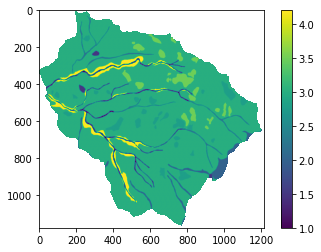

In [28]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/subunidades.tif?raw=true')
geomorfologia=raster.read(1)
geomorfologia=np.where(geomorfologia<1,np.nan,geomorfologia)
geomorfologia_vector=geomorfologia.ravel()
geomorfologia_vector_MenM=geomorfologia_vector[~np.isnan(geomorfologia_vector)]
plt.imshow(geomorfologia)
plt.colorbar()
geomorfologia_vector_MenM.shape


In [29]:
np.unique(geomorfologia)

array([1. , 1.5, 2. , 2.2, 2.8, 3. , 3.5, 4.2, nan])

In [32]:
ag=(geomorfologia == 1).sum()
bg=(geomorfologia == 1.5).sum()
cg=(geomorfologia == 2).sum()
dg=(geomorfologia == 2.2).sum()
eg=(geomorfologia == 2.8).sum()
fg=(geomorfologia == 3).sum()
gg=(geomorfologia == 3.5).sum()
hg=(geomorfologia == 4.2).sum()

totalg=ag+bg+cg+dg+eg+fg+gg+hg
print("total", totalg,ag,bg,cg,dg,eg,fg,gg,hg)

geomorfologiaconMenM=geomorfologia*inventario
ag1=(geomorfologiaconMenM == 1).sum()
bg1=(geomorfologiaconMenM == 1.5).sum()
cg1=(geomorfologiaconMenM == 2).sum()
dg1=(geomorfologiaconMenM == 2.2).sum()
eg1=(geomorfologiaconMenM == 2.8).sum()
fg1=(geomorfologiaconMenM == 3).sum()
gg1=(geomorfologiaconMenM == 3.5).sum()
hg1=(geomorfologiaconMenM == 4.2).sum()


totalg1=ag1+bg1+cg1+dg1+eg1+fg1+gg1+hg1
print("total1", totalg1,ag1,bg1,cg1,dg1,eg1,fg1,gg1,hg1)

w_a=(ag1/totalg1)/(ag/totalg)
w_b=(bg1/totalg1)/(bg/totalg)
w_c=(cg1/totalg1)/(cg/totalg)
w_d=(dg1/totalg1)/(dg/totalg)
w_e=(eg1/totalg1)/(eg/totalg)
w_f=(fg1/totalg1)/(fg/totalg)
w_g=(gg1/totalg1)/(gg/totalg)
w_h=(hg1/totalg1)/(hg/totalg)
print("w:", w_a,w_b,w_c,w_d,w_e,w_f,w_g,w_h)


total 821560 15235 2286 19489 9269 25554 692804 25363 31560
total1 52 0 0 0 0 0 42 0 10
w: 0.0 0.0 0.0 0.0 0.0 0.9578000304670473 0.0 5.006093399629521


[0.         0.95780003 5.0060934         nan]


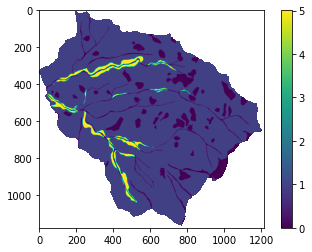

In [33]:
geomorfologia_re=np.where(geomorfologia<=1.0,w_a,geomorfologia)
geomorfologia_re=np.where(geomorfologia_re==1.5,w_b,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==2.0,w_c,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==2.2,w_d,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==2.8,w_e,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==3.0,w_f,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==3.5,w_g,geomorfologia_re)
geomorfologia_re=np.where(geomorfologia_re==4.2,w_h,geomorfologia_re)
print(np.unique(geomorfologia_re))
plt.imshow(geomorfologia_re);
plt.colorbar();

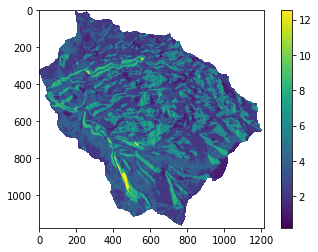

In [34]:
IS=pendiente_re+aspecto_re+curvatura_re+geomorfologia_re
plt.imshow(IS);
plt.colorbar();